In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
df = pd.read_csv('data/gender-classifier-DFE-791531.csv', encoding='latin-1')
df.sample(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
3079,815722374,False,finalized,3,10/26/15 23:06,brand,1.0000,yes,1.0,5/12/12 11:15,...,https://pbs.twimg.com/profile_images/376762259...,0,FFFFFF,5 things you can do tonight to reverse the U.S...,NaN,63666,10/26/15 12:40,6.587300e+17,NaN,Atlantic Time (Canada)
17093,815736616,False,finalized,3,10/26/15 22:58,female,1.0000,yes,1.0,2/10/12 10:57,...,https://pbs.twimg.com/profile_images/652896825...,0,C0DEED,@givenachancex @CelebMix Just given you the pr...,NaN,5430,10/26/15 13:19,6.587400e+17,In my Louis bubble,Hawaii
10446,815729810,False,finalized,3,10/27/15 0:40,brand,1.0000,yes,1.0,3/4/15 15:27,...,https://pbs.twimg.com/profile_images/578515979...,0,C0DEED,@traceytyler14 Thanks for following us! Please...,NaN,3978,10/26/15 13:20,6.587400e+17,"Medford, NJ",NaN
14037,815733494,False,finalized,3,10/26/15 21:59,female,0.6801,yes,1.0,6/2/15 4:27,...,https://pbs.twimg.com/profile_images/658345708...,0,0,MUKE IS REAL AND BETTER THAN LARRY \n\n https:...,NaN,15053,10/26/15 13:19,6.587400e+17,district 12,Pacific Time (US & Canada)
11894,815731291,False,finalized,3,10/26/15 22:47,female,1.0000,yes,1.0,5/31/09 11:28,...,https://pbs.twimg.com/profile_images/551862138...,0,F2E195,@Amanda_Sanford @BuzzFeeders oh they'd have no...,NaN,1627,10/26/15 13:20,6.587400e+17,"Mississippi, USA",Central Time (US & Canada)


In [64]:
df.shape

(20050, 26)

In [65]:
# Drop unnecessary columns/features
#data = df[df['profile_yn_gold'] == 'no']
column_to_drop = ['_last_judgment_at','user_timezone','tweet_coord','tweet_count','tweet_created',
                  'tweet_id','tweet_location','profileimage','created','_golden','_unit_state',
                  '_trusted_judgments','gender_gold']
df.drop(columns =column_to_drop, inplace=True, axis=1)
df.shape

(20050, 13)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 13 columns):
_unit_id                 20050 non-null int64
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
description              16306 non-null object
fav_number               20050 non-null int64
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text                     20050 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


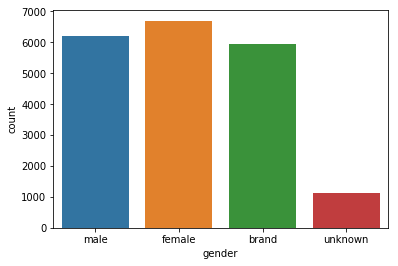

In [67]:
# df.groupby('gender').size()
import seaborn as sns
sns.countplot(df['gender'])

In [68]:
drop_items_idx = df[df['gender'] == 'unknown'].index
df.drop(index = drop_items_idx, inplace = True)

df['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [69]:
print ('profile_yn information:\n',df['profile_yn'].value_counts())

profile_yn information:
 yes    18836
no        97
Name: profile_yn, dtype: int64


In [70]:
drop_items_idx = df[df['profile_yn'] == 'no'].index
df.drop(index = drop_items_idx, inplace = True)
print (df['profile_yn'].value_counts())
# Drop not-required columns
df.drop(columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)
df.shape


yes    18836
Name: profile_yn, dtype: int64


(18836, 10)

In [71]:
gender_dic = dict(df['gender'].value_counts())


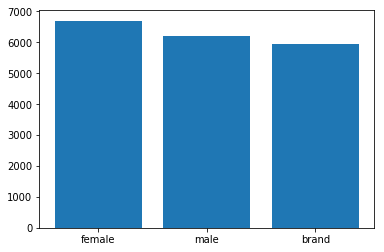

In [72]:
plt.bar(range(len(gender_dic)), list(gender_dic.values()), align='center')
plt.xticks(range(len(gender_dic)), list(gender_dic.keys()))
plt.show()

In [79]:
pd.crosstab(df.gender, df._unit_id.count(), rownames=['Gender'], colnames=['Total Count : '])

Total Count :,18836
Gender,
brand,5942
female,6700
male,6194


In [82]:
df.groupby('gender').size().sort_values(ascending=True)

gender
brand     5942
male      6194
female    6700
dtype: int64